# Let's explore EXFOR offerings for Ca48

In [3]:
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target = (48, 20)

In [7]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

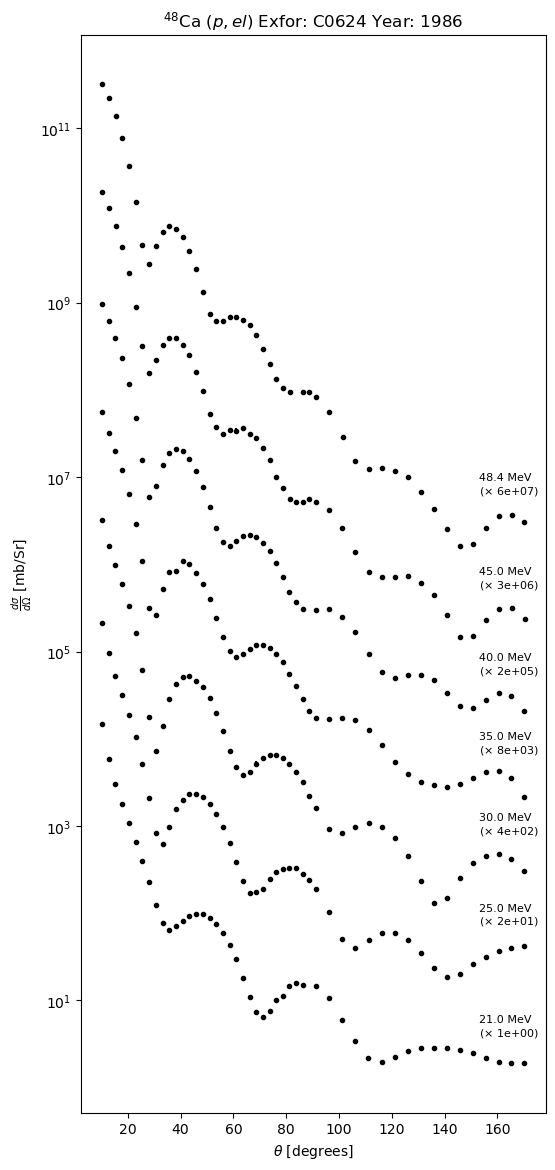

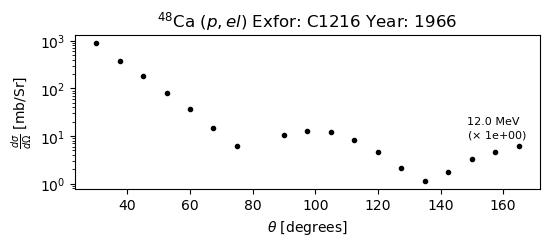

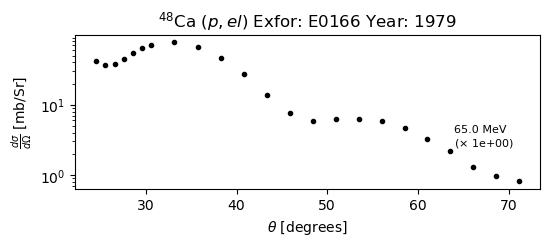

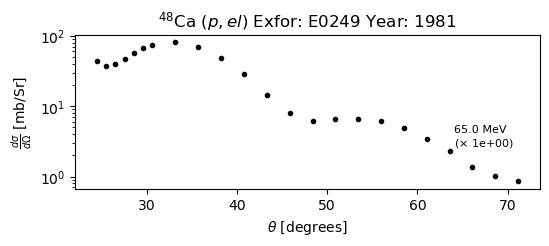

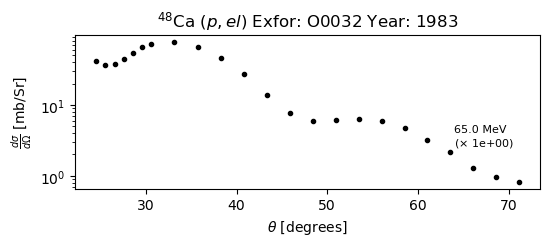

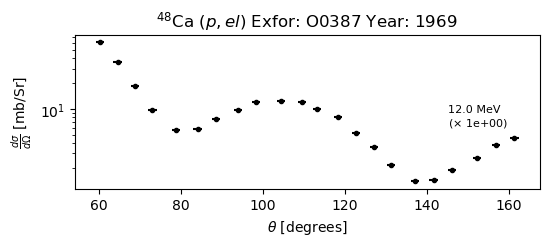

In [10]:
for entry, data in all_entries_pp.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    yr = data.meta["year"]
    ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")

In [15]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

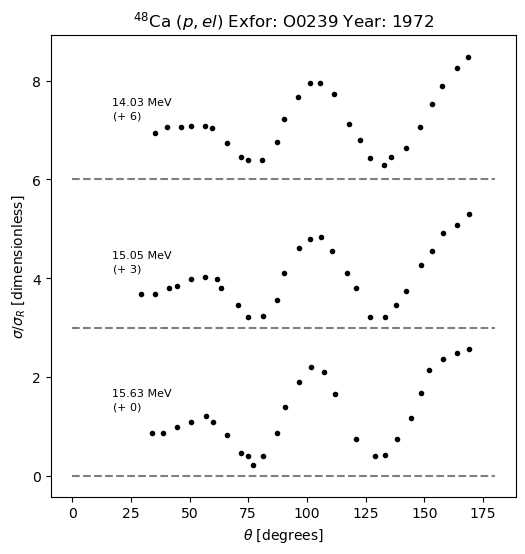

In [16]:
for entry, data in all_entries_pp_ruth.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=3,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.1,
        label_offset_factor=0.1,
        log=False,
        add_baseline=True,
    )
    yr = data.meta["year"]
    ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")

In [17]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

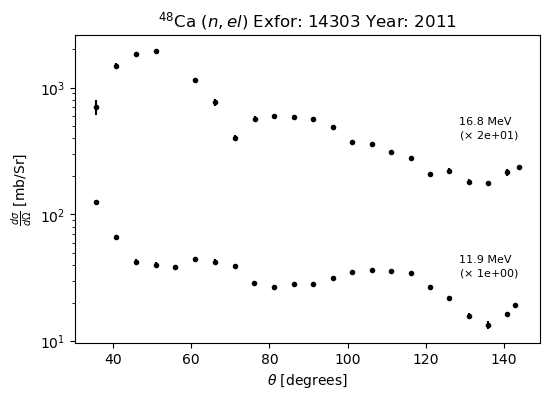

In [18]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    yr = data.meta["year"]
    ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")

In [19]:
from periodictable import elements
A,Z = target
with open(f"{elements[Z]}{A}_n_elastic.pkl" , "wb") as f:
    pickle.dump(all_entries_nn, f)

with open(f"{elements[Z]}{A}_p_elastic.pkl" , "wb") as f:
    pickle.dump( {"xs" : all_entries_pp , "ratio" : all_entries_pp_ruth}, f)